### Importo las librerias para trabajar

In [20]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import calendar

### Lista de colores 

In [21]:
colores = ['aliceblue', 'antiquewhite', 'aqua', 'aquamarine', 'azure', 'beige', 'bisque', 'black',
           'blanchedalmond', 'blue', 'blueviolet', 'brown', 'burlywood', 'cadetblue', 'chartreuse',
           'chocolate', 'coral', 'cornflowerblue', 'cornsilk', 'crimson', 'cyan', 'darkblue', 'darkcyan',
           'darkgoldenrod', 'darkgray', 'darkgreen', 'darkkhaki', 'darkmagenta', 'darkolivegreen',
           'darkorange', 'darkorchid', 'darkred', 'darksalmon', 'darkseagreen', 'darkslateblue',
           'darkslategray', 'darkturquoise', 'darkviolet', 'deeppink', 'deepskyblue', 'dimgray',
           'dodgerblue', 'firebrick', 'floralwhite', 'forestgreen', 'fuchsia', 'gainsboro', 'ghostwhite',
           'gold', 'goldenrod', 'gray', 'green', 'greenyellow', 'honeydew', 'hotpink', 'indianred', 'indigo',
           'ivory', 'khaki', 'lavender', 'lavenderblush', 'lawngreen', 'lemonchiffon', 'lightblue',
           'lightcoral', 'lightcyan', 'lightgoldenrodyellow', 'lightgray', 'lightgreen', 'lightpink',
           'lightsalmon', 'lightseagreen', 'lightskyblue', 'lightslategray', 'lightsteelblue',
           'lightyellow', 'lime', 'limegreen', 'linen', 'magenta', 'maroon', 'mediumaquamarine',
           'mediumblue', 'mediumorchid', 'mediumpurple', 'mediumseagreen', 'mediumslateblue',
           'mediumspringgreen', 'mediumturquoise', 'mediumvioletred', 'midnightblue', 'mintcream',
           'mistyrose', 'moccasin', 'navajowhite', 'navy', 'oldlace', 'olive', 'olivedrab', 'orange',
           'orangered', 'orchid', 'palegoldenrod', 'palegreen', 'paleturquoise', 'palevioletred',
           'papayawhip', 'peachpuff', 'peru', 'pink', 'plum', 'powderblue', 'purple', 'red', 'rosybrown',
           'royalblue', 'saddlebrown', 'salmon', 'sandybrown', 'seagreen', 'seashell', 'sienna', 'silver',
           'skyblue', 'slateblue', 'slategray', 'snow', 'springgreen', 'steelblue', 'tan', 'teal', 'thistle',
           'tomato', 'turquoise', 'violet', 'wheat', 'white', 'whitesmoke', 'yellow', 'yellowgreen']

### Lectura y creacion de los archivos para trabajar

In [22]:
data=os.listdir('data')
all_sales= pd.DataFrame()
for file in data:
    all_sales=pd.concat([all_sales,pd.read_csv("data/"+file)])

all_sales.to_csv('all_sales.csv')
all_sales=pd.read_csv('all_sales.csv')


### Limpieza de los datos

In [23]:
df_Nan=all_sales[all_sales.isnull()]
all_sales=all_sales.dropna()
all_sales.head(2)

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"


In [24]:
all_sales= all_sales[all_sales['Quantity Ordered']!='Quantity Ordered']
all_sales['Quantity Ordered']= pd.to_numeric(all_sales['Quantity Ordered'])
all_sales['Price Each']= pd.to_numeric(all_sales['Price Each'])
all_sales['Sales'] = all_sales['Quantity Ordered'].astype('int') * all_sales['Price Each'].astype('float')
all_sales['Month']=pd.to_datetime(all_sales['Order Date']).dt.month
all_sales['Day']=pd.to_datetime(all_sales['Order Date']).dt.day_name()
all_sales['Hour']=pd.to_datetime(all_sales['Order Date']).dt.hour


C:\Users\jhont\AppData\Local\Temp\ipykernel_12028\3327450059.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_sales['Month']=pd.to_datetime(all_sales['Order Date']).dt.month
C:\Users\jhont\AppData\Local\Temp\ipykernel_12028\3327450059.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_sales['Day']=pd.to_datetime(all_sales['Order Date']).dt.day_name()
C:\Users\jhont\AppData\Local\Temp\ipykernel_12028\3327450059.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_sales['Hour']=pd.to_datetime(all_sales['Order Date']).dt.hour


### Encontar el mes con mas ventas

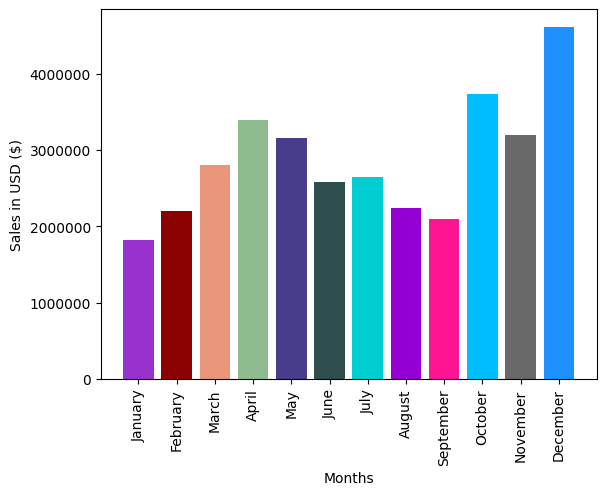

In [25]:
Month_sales=all_sales.groupby('Month').sum()['Sales']
Months= [calendar.month_name[month] for month in range(1,13)]
plt.bar(Months,Month_sales,color=colores[30:])
plt.xticks(Months , rotation='vertical')
plt.ylabel('Sales in USD ($)')
plt.ticklabel_format(style='plain', axis='y')
# Obtener el eje y actual
ax = plt.gca()
# Desactivar el redondeo automático en el eje y
ax.get_yaxis().get_major_formatter().set_useOffset(False)
plt.xlabel('Months')
plt.show()

## Concluciones 
Se puede apreciar que el mes con más ventas es diciembre es algo predecible ya que es el mes donde las personas poseen un mayor flujo de dinero lo cual es favorable para las ventas   

### Encuentra la ciudad con mas ventas

In [26]:
all_sales.head(2)

def get_city(direcion):
    return direcion.split(',')[1]

def get_states(direcion):
    return direcion.split(',')[2].split(' ')[1]

all_sales['City']=all_sales['Purchase Address'].apply(lambda x : f'{get_city(x)} ({get_states(x)})')
sales_city=all_sales.groupby('City').sum()['Sales']
citys = [city for city, df in all_sales.groupby('City')]



In [27]:
citys

[' Atlanta (GA)',
 ' Austin (TX)',
 ' Boston (MA)',
 ' Dallas (TX)',
 ' Los Angeles (CA)',
 ' New York City (NY)',
 ' Portland (ME)',
 ' Portland (OR)',
 ' San Francisco (CA)',
 ' Seattle (WA)']

### Grafico para ver mejor los datos

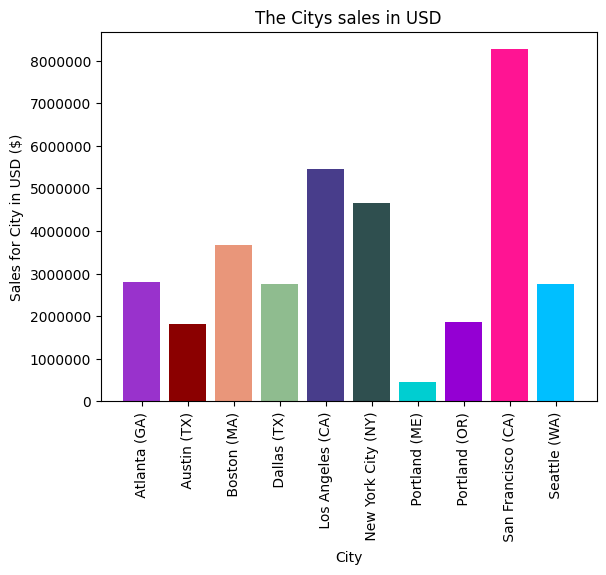

In [28]:
plt.bar(citys,sales_city,color=colores[30:])
plt.xticks(citys, rotation='vertical')
plt.xlabel('City')
plt.ylabel('Sales for City in USD ($)')
plt.title('The Citys sales in USD')
plt.ticklabel_format(style='plain', axis='y')
# Obtener el eje y actual
ax = plt.gca()
# Desactivar el redondeo automático en el eje y
ax.get_yaxis().get_major_formatter().set_useOffset(False)
plt.show()

### Concluciones
San Francisco posee la mayor cantidad de ventas esto se debe a su tamaño y poder adquisitivo y además es una zona donde los productos electrónicos poseen una alta demanda por el número de compañías tecnológicas que hay  el caso de Portal en sus ventas tan bajas el tamaño incide mucho con respecto al resto de estados

### Encuentra los 5 producto mas vendido

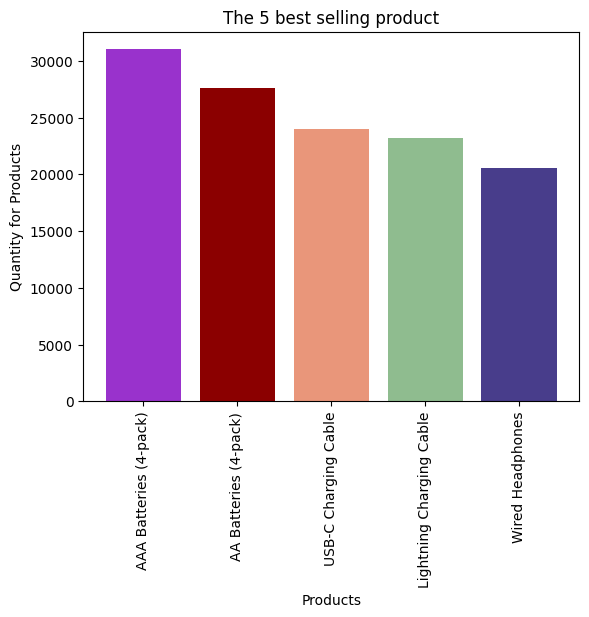

In [29]:
product=all_sales.groupby('Product').sum()['Quantity Ordered'].sort_values(ascending=False).head(5)
product=dict(product)

plt.bar(product.keys(),product.values(),color=colores[30:])
plt.xticks(rotation='vertical')
plt.xlabel('Products')
plt.ylabel('Quantity for Products')
plt.title('The 5 best selling product')
plt.show()

### Encuentra los 5 productos menos vendidos

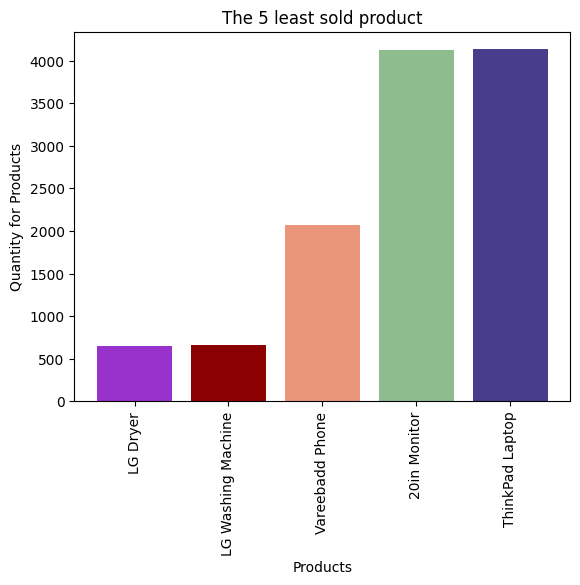

In [30]:
product=all_sales.groupby('Product').sum()['Quantity Ordered'].sort_values().head(5)
product=dict(product)

plt.bar(product.keys(),product.values(),color=colores[30:])
plt.xticks(rotation='vertical')
plt.xlabel('Products')
plt.ylabel('Quantity for Products')
plt.title('The 5 least sold product')
plt.show()

### Los productos que generaron mas ingresos

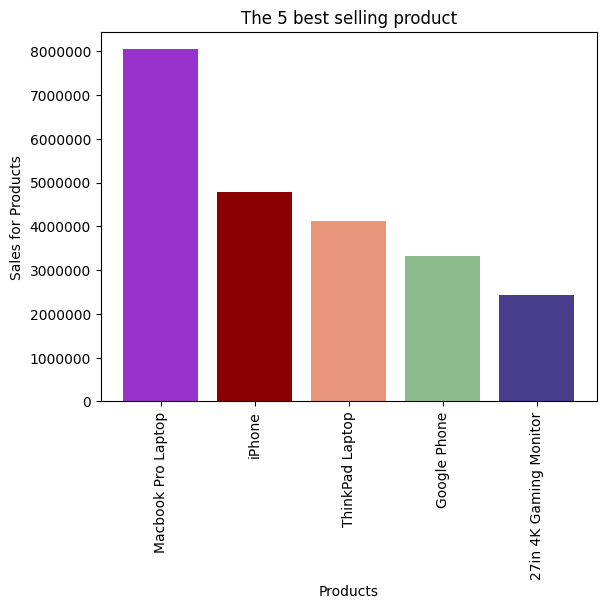

In [31]:
product=all_sales.groupby('Product').sum()['Sales'].sort_values(ascending=False).head(5)
product=dict(product)

plt.bar(product.keys(),product.values(),color=colores[30:])
plt.xticks(rotation='vertical')
plt.xlabel('Products')
plt.ylabel('Sales for Products')
plt.title('The 5 best selling product')
plt.ticklabel_format(style='plain', axis='y')
# Obtener el eje y actual
ax = plt.gca()
# Desactivar el redondeo automático en el eje y
ax.get_yaxis().get_major_formatter().set_useOffset(False)
plt.show()

### Los 5 productos que generaron menos ingresos


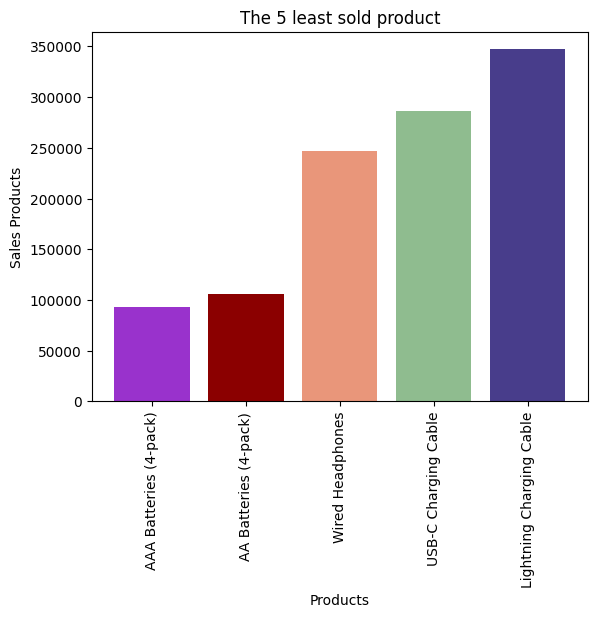

In [32]:
product=all_sales.groupby('Product').sum()['Sales'].sort_values().head(5)
product=dict(product)

bars=plt.bar(product.keys(),product.values(),color=colores[30:])
plt.xticks(rotation='vertical')
plt.xlabel('Products')
plt.ylabel('Sales Products')
plt.title('The 5 least sold product')
ax = plt.gca()
'''
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords='offset points',
                 ha='center', va='bottom')'''


plt.show()

### Grafico para ver el panorama de las ventas por producto completo

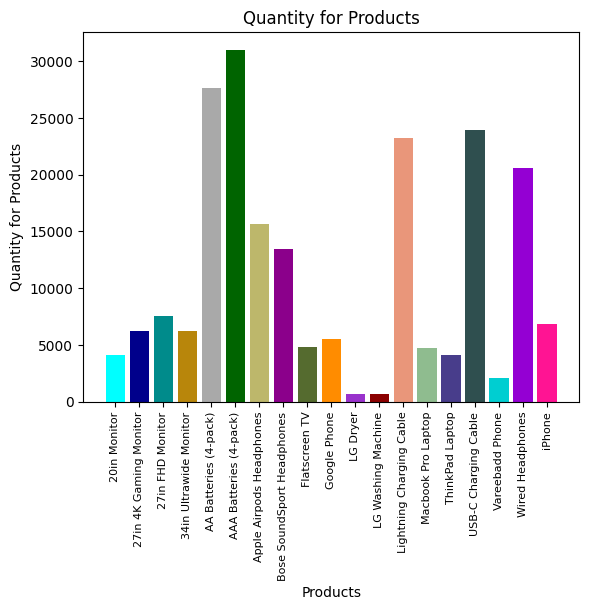

In [33]:
products=all_sales.groupby('Product')
Quantity=products.sum()['Quantity Ordered']
key=[pair for pair ,df in products]
plt.bar(key,Quantity,color=colores[20:])
plt.xticks(rotation='vertical',size=8)
plt.xlabel('Products')
plt.ylabel('Quantity for Products')
plt.title('Quantity for Products')
plt.show()

### comprobando si hay una relacion entre la cantida vendidad y el precio

C:\Users\jhont\AppData\Local\Temp\ipykernel_12028\2904819732.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(key, rotation='vertical', size=8)
C:\Users\jhont\AppData\Local\Temp\ipykernel_12028\2904819732.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


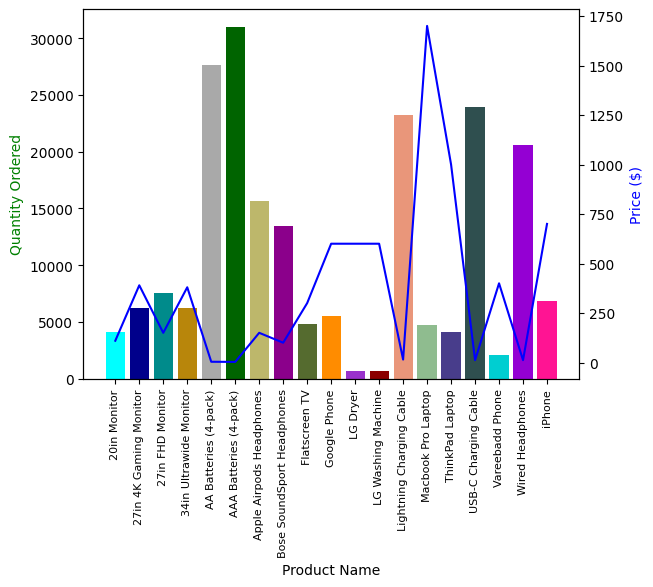

In [34]:
prices = all_sales.groupby('Product')['Price Each'].mean()
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(key, Quantity, color=colores[20:])
ax2.plot(key, prices, color='b')
ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(key, rotation='vertical', size=8)
fig.show()

### Producto que genero mas ingresos

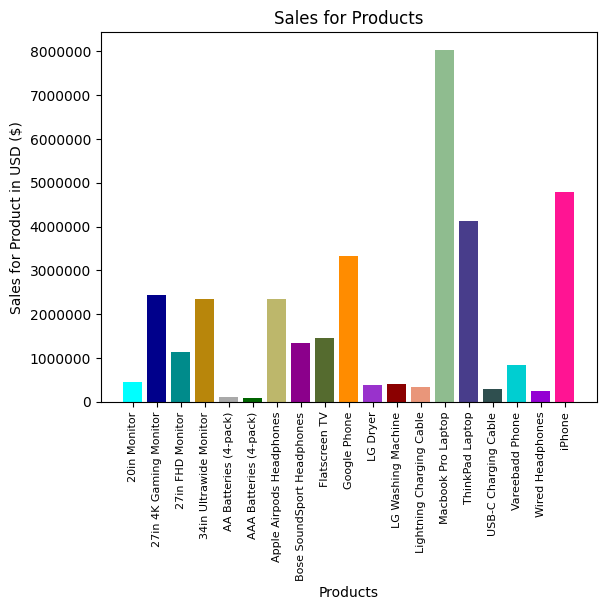

In [35]:
products=all_sales.groupby('Product')
Sales=products.sum()['Sales']
key=[pair for pair ,df in products]
plt.bar(key,Sales,color=colores[20:])
plt.xticks(rotation='vertical',size=8)
plt.xlabel('Products')
plt.ylabel('Sales for Product in USD ($)')
plt.title('Sales for Products')
plt.ticklabel_format(style='plain', axis='y')
# Obtener el eje y actual
ax = plt.gca()
# Desactivar el redondeo automático en el eje y
ax.get_yaxis().get_major_formatter().set_useOffset(False)

plt.show()

### Concluciones 
En cuanto los productos podemos decir que hay una correlación entre el precio y la cantidad de pedidos, pero podemos apreciar que mas pedidos no significa mas ingresos ya que los productos con menos pedidos pero con alto valor son los que mas generaron ingresos 

### Total de las ventas por dias en todo el año

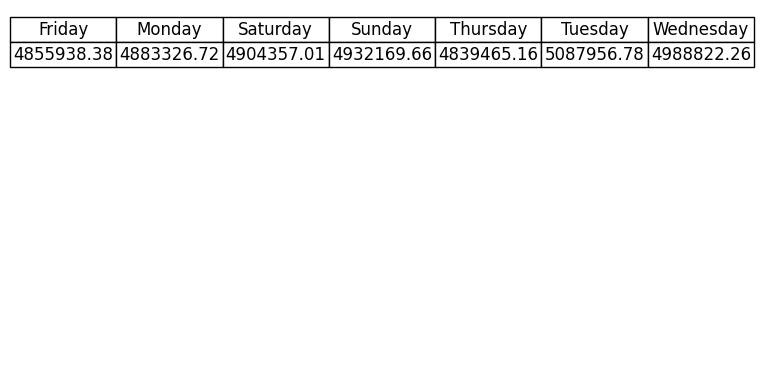

In [36]:
df_day=all_sales.groupby('Day')
sale_day=list(df_day['Sales'].sum())
days=[day for day ,df in df_day]
sale_day=[days,sale_day]
tabla=plt.table(cellText=sale_day, loc='upper center', cellLoc='center', colLabels=None)
tabla.auto_set_font_size(False)
tabla.set_fontsize(12)
tabla.scale(1.5, 1.5)  # Ajustar el tamaño de la tabla
plt.axis('off')
plt.show()


In [37]:
#creo la columna de los minutos 
all_sales['Minute']=pd.to_datetime(all_sales['Order Date']).dt.minute
all_sales['Order Date']=pd.to_datetime(all_sales['Order Date'])


C:\Users\jhont\AppData\Local\Temp\ipykernel_12028\1064157585.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_sales['Minute']=pd.to_datetime(all_sales['Order Date']).dt.minute
C:\Users\jhont\AppData\Local\Temp\ipykernel_12028\1064157585.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_sales['Order Date']=pd.to_datetime(all_sales['Order Date'])


In [38]:
#cambio el tipo de dato de la columna mes para que aperesca el nombre del mes y no el numero
all_sales['Month']=pd.to_datetime(all_sales['Order Date']).dt.month_name()
del all_sales['Unnamed: 0']

### Encontrar las horas con mas pedidos

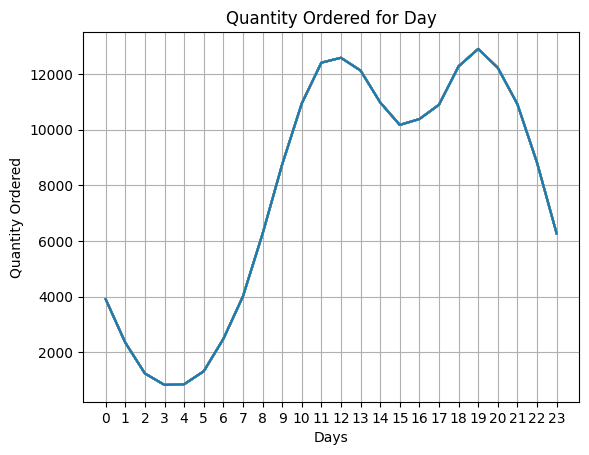

In [39]:
keys = [pair for pair, df in all_sales.groupby('Hour')]
plt.plot(keys, all_sales.groupby('Hour').count())
plt.xticks(keys)
plt.xlabel('Days')
plt.ylabel('Quantity Ordered')
plt.title('Quantity Ordered for Day')
plt.grid()
plt.show()

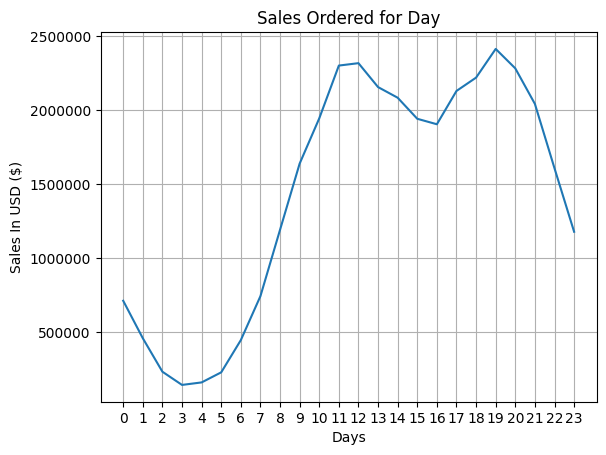

In [41]:
sales_hour=all_sales.groupby('Hour')['Sales'].sum()
plt.plot(keys,sales_hour)
plt.xticks(keys)
plt.xlabel('Days')
plt.ylabel('Sales In USD ($)')
plt.title('Sales Ordered for Day')
plt.ticklabel_format(style='plain', axis='y')
# Obtener el eje y actual
ax = plt.gca()
# Desactivar el redondeo automático en el eje y
ax.get_yaxis().get_major_formatter().set_useOffset(False)
plt.grid()
plt.show()

### Concluciones
A partir del grafico de horas se le puede recomendar al equipo comercial que le den prioridad a los anuncios desde 9:00 Am a 16:00 Pm para tener regularidad en las ventas y causar un aumento de las mismas 

### Encuentro cuales son los dos productos que mas se venden juntos


In [42]:
df = all_sales[all_sales['Order ID'].duplicated(keep=False)]
df['Grouped'] = all_sales.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))
df2 = df[['Order ID', 'Grouped']].drop_duplicates()


C:\Users\jhont\AppData\Local\Temp\ipykernel_12028\585809431.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = all_sales.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))


In [43]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

list_products_pair=[]
product_pair_value=[]
for key,value in count.most_common(10):
    key=str(key).replace(f"'",'')
    key=str(key).replace(f"(",'')
    key=str(key).replace(f")",'')
    list_products_pair.append(key)
    product_pair_value.append(value)

data={'Names of the Products':list_products_pair,'Quantity':product_pair_value}
df_10_products_best=pd.DataFrame(data,index=range(1,11))

### Los 10 pares de productos mas vendidos

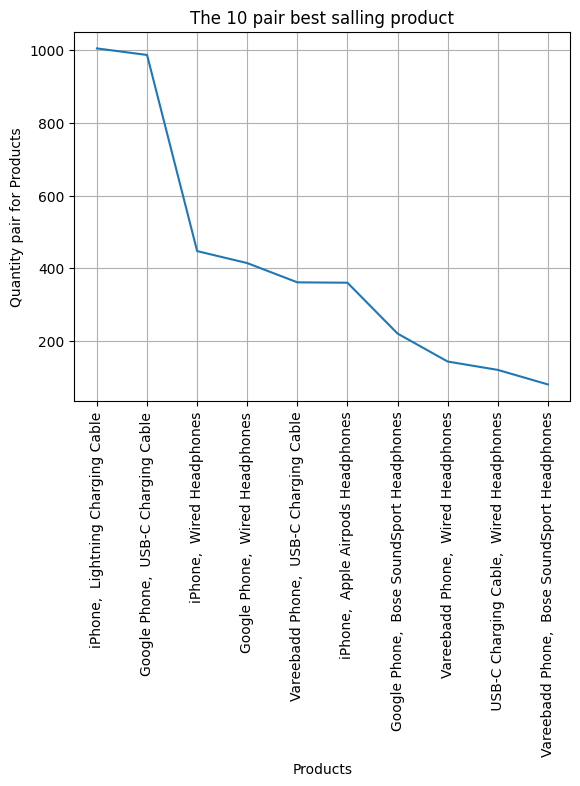

In [45]:
df_10_products_best
plt.plot(df_10_products_best['Names of the Products'],df_10_products_best['Quantity'])
plt.xticks(rotation='vertical',size=10)
plt.xlabel('Products')
plt.ylabel('Quantity pair for Products')
plt.title('The 10 pair best salling product')
plt.grid()
plt.show()

### Concluciones
Con la información del grafico de productos que mas se venden juntos el equipo de ventas como recomendación puede generar promociones que incentiven a mas compras o a cautivar el cliente y generar fidelidad con la compañía 